### Libraries import

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,f1_score,cohen_kappa_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

### Dataset Load

In [2]:
df=pd.read_csv(r'C:\Users\VivekSharma\Downloads\machine learning model\loan_approval_dataset.csv')
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
loan_id,4269.0,2.135000e+03,1.232498e+03,1.0,1068.0,2135.0,3202.0,4269.0
no_of_dependents,4269.0,2.498712e+00,1.695910e+00,0.0,1.0,3.0,4.0,5.0
income_annum,4269.0,5.059124e+06,2.806840e+06,200000.0,2700000.0,5100000.0,7500000.0,9900000.0
loan_amount,4269.0,1.513345e+07,9.043363e+06,300000.0,7700000.0,14500000.0,21500000.0,39500000.0
loan_term,4269.0,1.090045e+01,5.709187e+00,2.0,6.0,10.0,16.0,20.0
cibil_score,4269.0,5.999361e+02,1.724304e+02,300.0,453.0,600.0,748.0,900.0
residential_assets_value,4269.0,7.472617e+06,6.503637e+06,-100000.0,2200000.0,5600000.0,11300000.0,29100000.0
commercial_assets_value,4269.0,4.973155e+06,4.388966e+06,0.0,1300000.0,3700000.0,7600000.0,19400000.0
luxury_assets_value,4269.0,1.512631e+07,9.103754e+06,300000.0,7500000.0,14600000.0,21700000.0,39200000.0
bank_asset_value,4269.0,4.976692e+06,3.250185e+06,0.0,2300000.0,4600000.0,7100000.0,14700000.0


In [5]:
df.isnull().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

In [6]:
df.shape

(4269, 13)

### Data Cleaning

In [7]:
df.columns
a=' no_of_dependents'
for i in df.columns:
    df.rename({i:i.strip()},axis=1,inplace=True)

In [8]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


### Univariate Analysis

In [9]:
num_col=df.select_dtypes(include=np.number).columns
cat_col=df.select_dtypes(include=np.object).columns

In [10]:
num_col.shape,cat_col.shape

((10,), (3,))

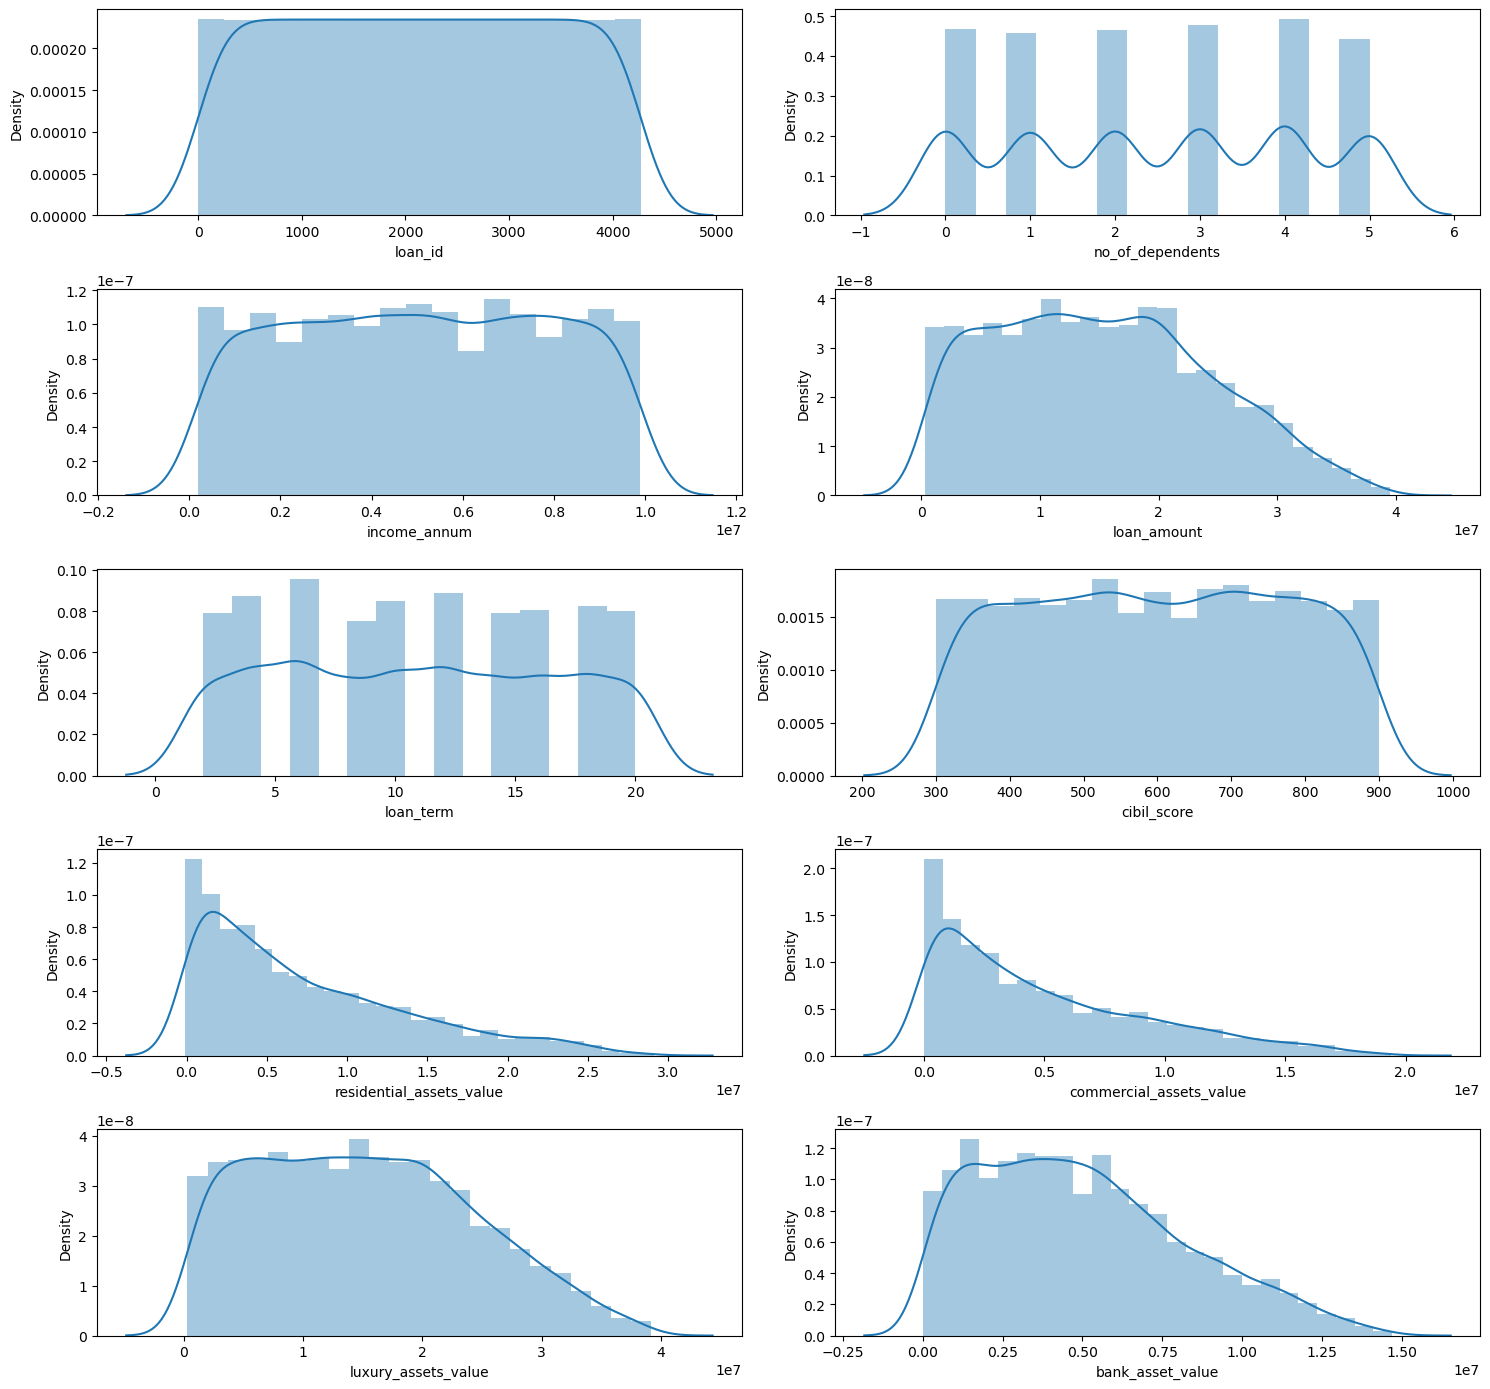

In [11]:
t=1
plt.figure(figsize=[15,14])
for i in num_col:
    plt.subplot(5,2,t)
    sns.distplot(df[i])
    t=t+1
plt.tight_layout()
plt.show()

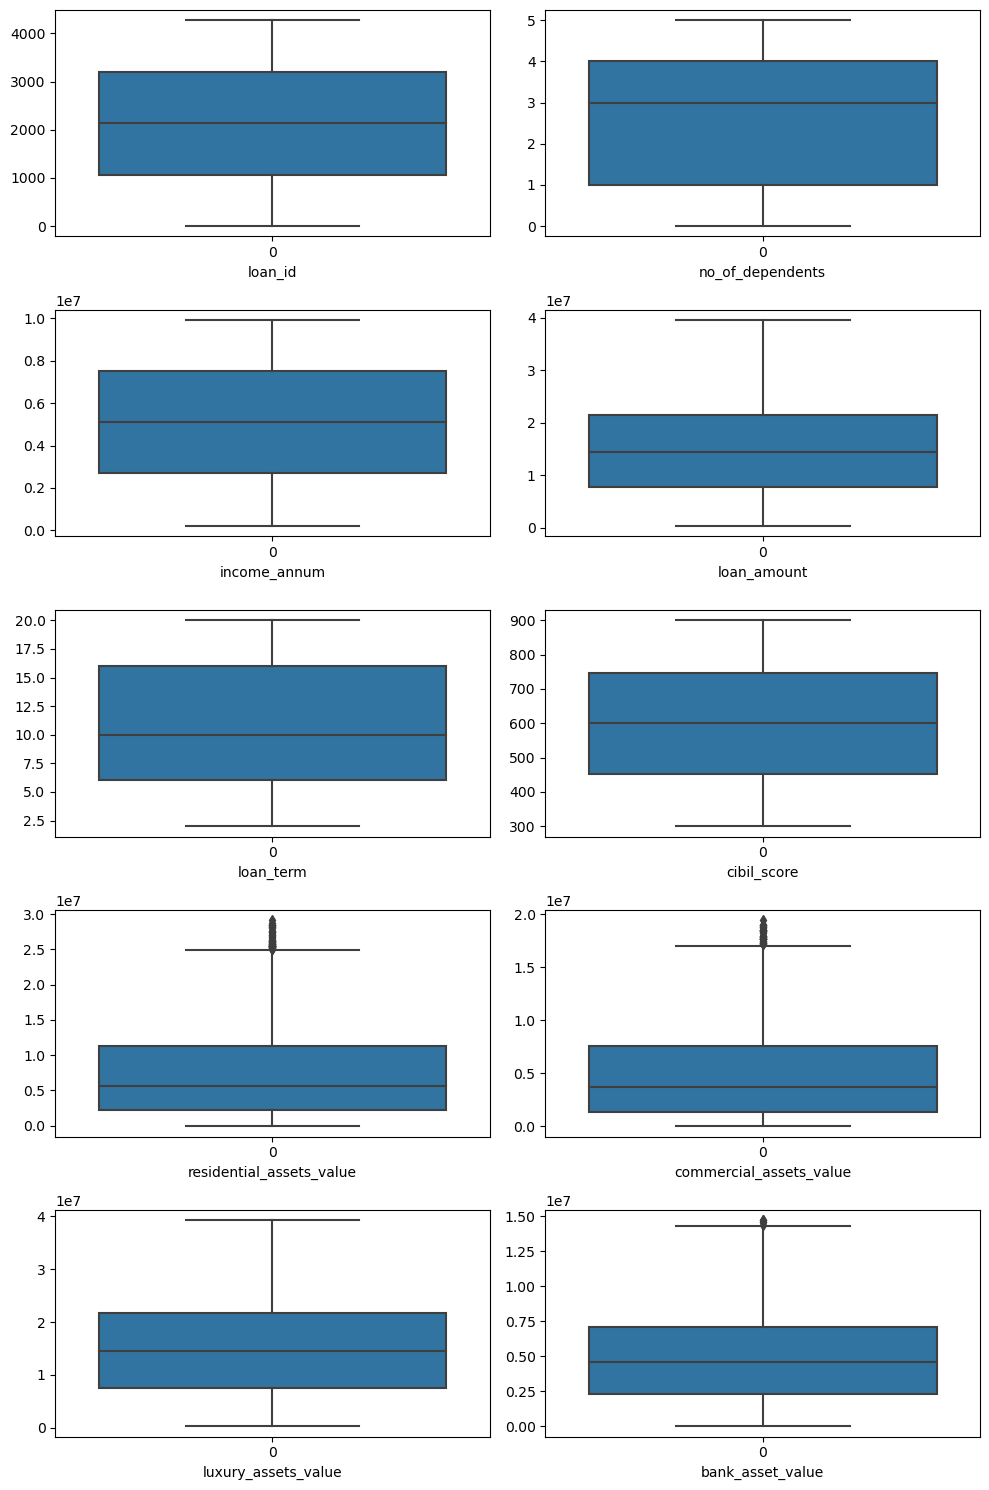

In [12]:
t=1
plt.figure(figsize=[10,15])
for i in num_col:
    plt.subplot(5,2,t)
    sns.boxplot(df[i])
    plt.xlabel(i)
    t=t+1
plt.tight_layout()
plt.show()

In [13]:
cat_col

Index(['education', 'self_employed', 'loan_status'], dtype='object')

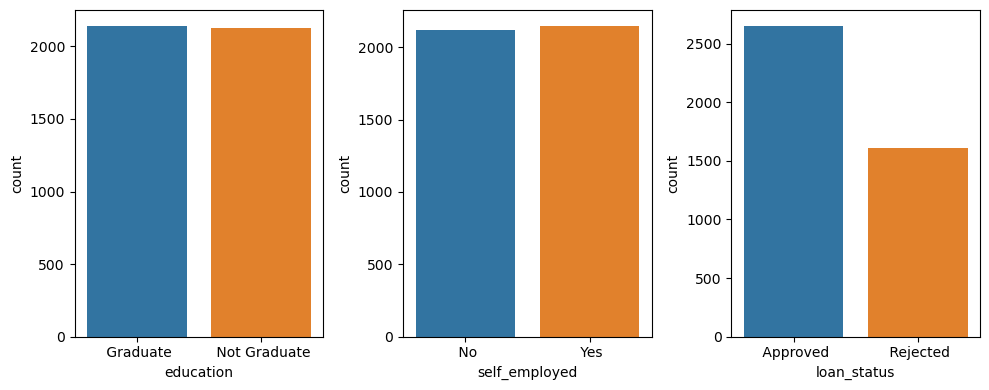

In [14]:
t=1
plt.figure(figsize=[10,4])
for i in cat_col:
    plt.subplot(1,3,t)
    sns.countplot(x=df[i])
    t=t+1
plt.tight_layout()
plt.show()

In [15]:
df['education'].value_counts()

 Graduate        2144
 Not Graduate    2125
Name: education, dtype: int64

### Bivariate analysis

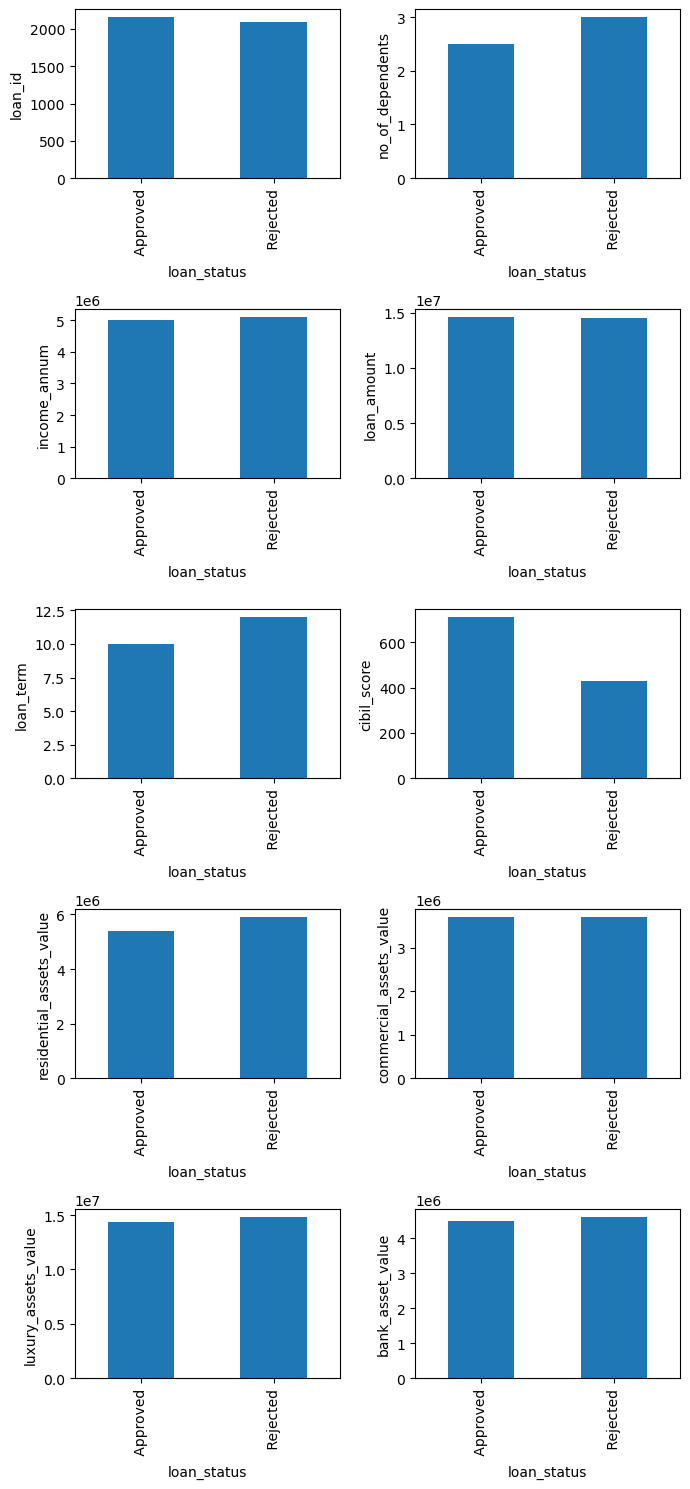

In [16]:
t=1
plt.figure(figsize=[7,15])
for i in num_col:
    plt.subplot(5,2,t)
    df.groupby('loan_status')[i].median().plot(kind='bar')
    plt.ylabel(i)
    t=t+1
plt.tight_layout()
plt.show()

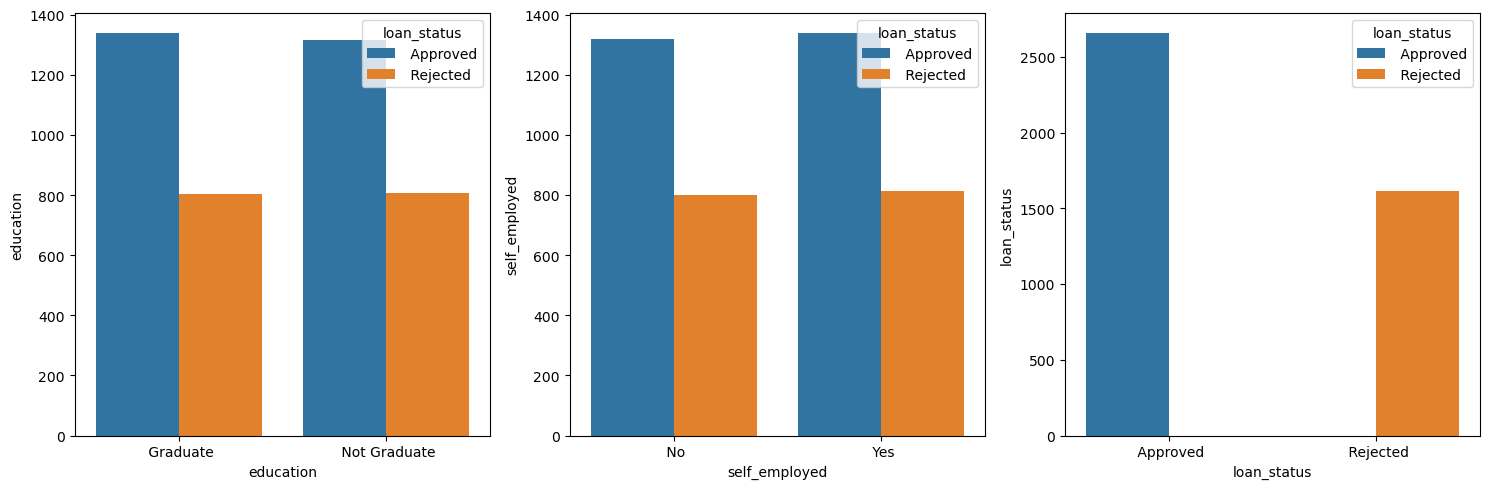

In [17]:
t=1
plt.figure(figsize=[15,5])
for i in cat_col:
    plt.subplot(1,3,t)
    sns.countplot(x=df[i],hue='loan_status',data=df)
    plt.ylabel(i)
    t=t+1
plt.tight_layout()
plt.show()

### Missing value treatment

In [18]:
df.isnull().sum()

loan_id                     0
no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64

In [19]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


### Standardisation column

In [20]:
df.select_dtypes(np.number).columns
stand_col=['no_of_dependents', 'income_annum', 'loan_amount',
       'loan_term', 'cibil_score', 'residential_assets_value',
       'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value']


### Encoding

In [21]:
df1=df.drop('loan_id',axis=1)
df2=pd.get_dummies(df1,drop_first=False)
df2.drop(['education_ Not Graduate','self_employed_ No','loan_status_ Rejected'],axis=1,inplace=True)
df2.head()

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,education_ Graduate,self_employed_ Yes,loan_status_ Approved
0,2,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1,0,1
1,0,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0,1,0
2,3,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1,0,0
3,3,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1,0,0
4,5,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0,1,0


### Feature Enginnering

In [22]:
df3=pd.DataFrame(np.zeros(len(df2)))
for i in df2.drop(['education_ Graduate','self_employed_ Yes','loan_status_ Approved'],axis=1).columns:
    df3[f'{i}>_median']=df2[i].apply(lambda x: 1 if x>df2[i].median() else 0)

In [23]:
df3[['education_ Graduate','self_employed_ Yes','loan_status_ Approved']]=df2[['education_ Graduate','self_employed_ Yes','loan_status_ Approved']]

In [24]:
df3=df3.drop(0,axis=1)

### Train Test Split

In [46]:
X=df2.drop('loan_status_ Approved',axis=1)
y=df2['loan_status_ Approved']
print(X.shape,y.shape)
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2,random_state=41)
print(xtrain.shape,xtest.shape,ytrain.shape,ytest.shape)

(4269, 11) (4269,)
(3415, 11) (854, 11) (3415,) (854,)


In [47]:
# X=df3.drop('loan_status_ Approved',axis=1)
# y=df3['loan_status_ Approved']
# print(X.shape,y.shape)
# xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2,random_state=41)
# print(xtrain.shape,xtest.shape,ytrain.shape,ytest.shape)

### Standardisation xtrain and xtest

In [48]:
stand_col
ss=StandardScaler()
for i in stand_col:
    xtrain.loc[:,i]=ss.fit_transform(pd.DataFrame(xtrain.loc[:,i]))

In [49]:
for i in stand_col:
    xtest.loc[:,i]=ss.fit_transform(pd.DataFrame(xtest.loc[:,i]))

### Applying Machine Learning Models

In [50]:
def evaluation(acc,pred):
    print('confusion matrix \n',confusion_matrix(acc,pred))
    print('accuracy score', accuracy_score(acc,pred))
    print('f1 score',f1_score(acc,pred))
    print('classification report \n', classification_report(acc,pred))
def roc(actual,pred_prob):
    fpr,tpr,thres = roc_curve(actual,pred_prob)
    plt.plot(fpr,tpr,color='r')
    plt.plot([0,1],[0,1],ls='--',color='b')
    plt.xlabel('FPR AUC: %.2f'%roc_auc_score(actual,pred_prob))
    plt.ylabel('TPR')
    plt.show()

In [51]:
import statsmodels.api as sma
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve,roc_auc_score

### Base model- logistic regression

In [52]:
model=sma.Logit(ytrain,xtrain).fit()
model.summary()

Optimization terminated successfully.
         Current function value: inf
         Iterations 8


C:\Users\VivekSharma\anaconda3\lib\site-packages\statsmodels\base\model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\VivekSharma\anaconda3\lib\site-packages\statsmodels\base\model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


<class 'statsmodels.iolib.summary.Summary'>
"""
                             Logit Regression Results                            
=================================================================================
Dep. Variable:     loan_status_ Approved   No. Observations:                 3415
Model:                             Logit   Df Residuals:                     3404
Method:                              MLE   Df Model:                           10
Date:                   Fri, 11 Aug 2023   Pseudo R-squ.:                     inf
Time:                           08:53:47   Log-Likelihood:                   -inf
converged:                          True   LL-Null:                        0.0000
Covariance Type:               nonrobust   LLR p-value:                     1.000
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
no_of_dependents            -0.0792      0.063     -1.251      0.211      -0.203       0.045
income_annum                -1.6278      0.276     -5.891      0.000      -2.169      -1.086
loan_amount                  1.2928      0.176      7.360      0.000       0.949       1.637
loan_term                   -0.7252      0.068    -10.660      0.000      -0.859      -0.592
cibil_score                  3.8673      0.139     27.823      0.000       3.595       4.140
residential_assets_value     0.0737      0.083      0.892      0.372      -0.088       0.236
commercial_assets_value      0.1198      0.083      1.443      0.149      -0.043       0.282
luxury_assets_value          0.2206      0.170      1.301      0.193      -0.112       0.553
bank_asset_value             0.1100      0.118      0.931      0.352      -0.122       0.341
education_ Graduate          1.1370      0.111     10.228      0.000       0.919       1.355
self_employed_ Yes           1.0660      0.109      9.753      0.000       0.852       1.280
============================================================================================
"""

confusion matrix 
 [[273  48]
 [ 46 487]]
accuracy score 0.8899297423887588
f1 score 0.9119850187265918
classification report 
               precision    recall  f1-score   support

           0       0.86      0.85      0.85       321
           1       0.91      0.91      0.91       533

    accuracy                           0.89       854
   macro avg       0.88      0.88      0.88       854
weighted avg       0.89      0.89      0.89       854



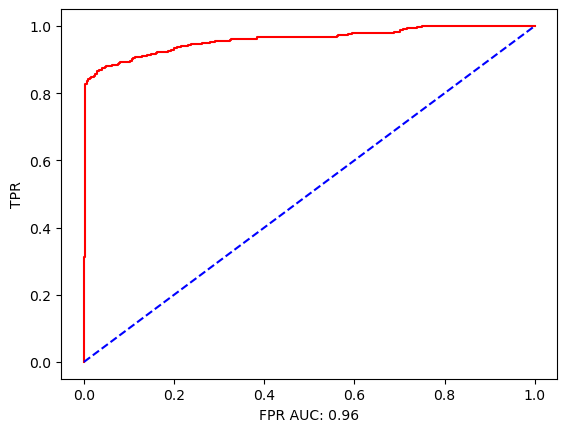

In [53]:
lr=LogisticRegression()
model=lr.fit(xtrain,ytrain)
pred=model.predict(xtest)
evaluation(ytest,pred)
roc(ytest,model.predict_proba(xtest)[:,1])

### Decision Tree

confusion matrix 
 [[305  16]
 [ 18 515]]
accuracy score 0.9601873536299765
f1 score 0.9680451127819549
classification report 
               precision    recall  f1-score   support

           0       0.94      0.95      0.95       321
           1       0.97      0.97      0.97       533

    accuracy                           0.96       854
   macro avg       0.96      0.96      0.96       854
weighted avg       0.96      0.96      0.96       854



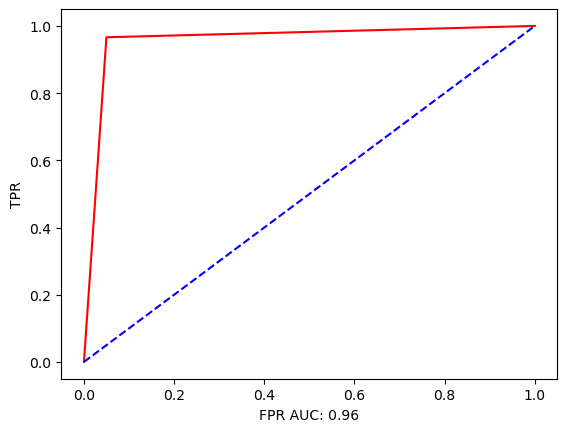

In [54]:
lr=DecisionTreeClassifier()
model=lr.fit(xtrain,ytrain)
pred=model.predict(xtest)
evaluation(ytest,pred)
roc(ytest,model.predict_proba(xtest)[:,1])

### Random Forest

confusion matrix 
 [[307  14]
 [ 13 520]]
accuracy score 0.968384074941452
f1 score 0.9746954076850984
classification report 
               precision    recall  f1-score   support

           0       0.96      0.96      0.96       321
           1       0.97      0.98      0.97       533

    accuracy                           0.97       854
   macro avg       0.97      0.97      0.97       854
weighted avg       0.97      0.97      0.97       854



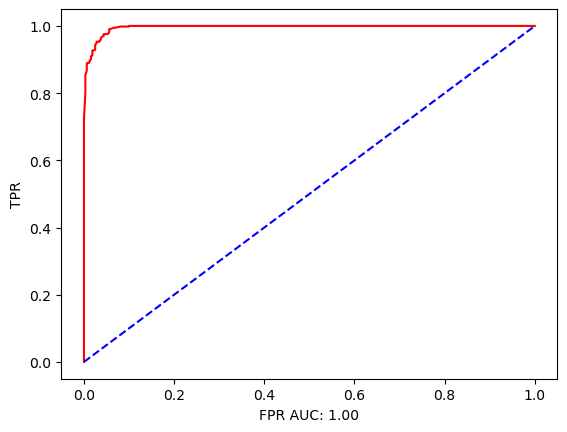

In [55]:
lr=RandomForestClassifier()
model=lr.fit(xtrain,ytrain)
pred=model.predict(xtest)
evaluation(ytest,pred)
roc(ytest,model.predict_proba(xtest)[:,1])

### K Nearest neighbour

confusion matrix 
 [[280  41]
 [ 47 486]]
accuracy score 0.8969555035128806
f1 score 0.9169811320754716
classification report 
               precision    recall  f1-score   support

           0       0.86      0.87      0.86       321
           1       0.92      0.91      0.92       533

    accuracy                           0.90       854
   macro avg       0.89      0.89      0.89       854
weighted avg       0.90      0.90      0.90       854



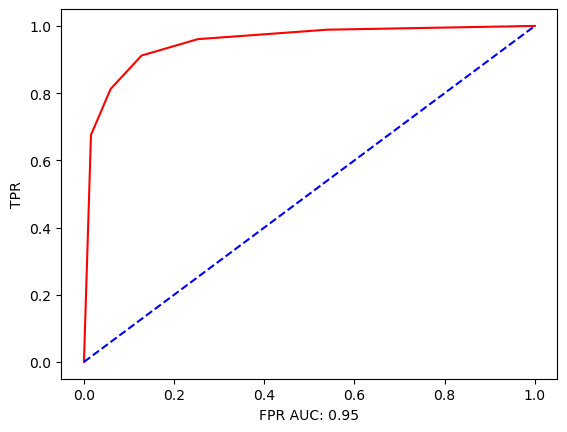

In [56]:
lr=KNeighborsClassifier()
model=lr.fit(xtrain,ytrain)
pred=model.predict(xtest)
evaluation(ytest,pred)
roc(ytest,model.predict_proba(xtest)[:,1])